# Relatório de Análises I

## Importando a base de dados

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('aluguel.csv/aluguel.csv' , sep=';')
dados.head(5)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [3]:
type(dados)

pandas.core.frame.DataFrame

## Informações gerais sobre a base de dados

In [4]:
tipos_de_dados = pd.DataFrame(dados.dtypes , columns = ['Tipos de Dados'])

In [5]:
tipos_de_dados.columns.name = 'Variáveis'
tipos_de_dados

Variáveis,Tipos de Dados
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


In [6]:
dados.shape

(32960, 9)

# Parte 2

## Remover repetições dos tipos de imóveis

In [7]:
tipo_de_imovel = dados['Tipo']

In [8]:
type(tipo_de_imovel)

pandas.core.series.Series

In [9]:
tipo_de_imovel.drop_duplicates(inplace = False) #True to apply the changes 

0                          Quitinete
1                               Casa
2            Conjunto Comercial/Sala
3                        Apartamento
7                 Casa de Condomínio
16                    Prédio Inteiro
17                              Flat
29                        Loja/Salão
80           Galpão/Depósito/Armazém
83                    Casa Comercial
117                     Casa de Vila
159                   Terreno Padrão
207                      Box/Garagem
347                             Loft
589      Loja Shopping/ Ct Comercial
2157                         Chácara
3354           Loteamento/Condomínio
4379                           Sítio
4721                   Pousada/Chalé
6983                          Studio
9687                           Hotel
23614                      Indústria
Name: Tipo, dtype: object

In [10]:
tipo_de_imovel

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

## Organizando a visualização

In [11]:
tipo_de_imovel = pd.DataFrame(tipo_de_imovel)
tipo_de_imovel.index = range(tipo_de_imovel.shape[0])
tipo_de_imovel.head()

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Apartamento


In [12]:
tipo_de_imovel.columns.name = 'Id'
tipo_de_imovel.head()

Id,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Apartamento


# Parte 3

## Remover imóveis que não sejam 'residenciais'

In [13]:
list(tipo_de_imovel)

['Tipo']

In [14]:
residencial = ['Quitinete',
 'Casa',
 'Apartamento',
 'Casa de Condomínio',
 'Casa de Vila']
residencial

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

In [15]:
selecao = dados['Tipo'].isin(residencial)
selecao.index = range(selecao.shape[0])
selecao

0         True
1         True
2        False
3         True
4         True
         ...  
32955     True
32956     True
32957     True
32958     True
32959    False
Name: Tipo, Length: 32960, dtype: bool

In [16]:
dados_residencial = dados[  dados['Tipo'].isin(residencial)  ]
dados_residencial.index = range(dados_residencial.shape[0])
dados_residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


## Exportando a base de dados

In [17]:
dados_residencial.to_csv('aluguel.csv/aluguel_residencial.csv')

In [18]:
dados_residencial_2 = pd.read_csv('aluguel.csv/aluguel_residencial.csv')
dados_residencial_2.head() # Acontece dele exportar os índices como colunas de dados. É possível resolver isso

,Unnamed: 0,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [19]:
dados_residencial.to_csv('aluguel.csv/aluguel_residencial.csv', sep = ';' , index = False)
dados_residencial_2 = pd.read_csv('aluguel.csv/aluguel_residencial.csv' , sep = ';')
dados_residencial_2.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


# Parte 5

## Filtragens sofisticadas e contagem da frequência

In [20]:
# Somente tipo apartamento
selecao = dados['Tipo'] == 'Apartamento'
n_apartamentos = dados[selecao].shape[0]
n_apartamentos

19532

In [21]:
# 'Casa', 'Casa de Condomínio' ou 'Casa de Vila'
selecao = (dados['Tipo'] == 'Casa') | (dados['Tipo'] == 'Casa de Condomínio') | (dados['Tipo'] == 'Casa de Vila')
n_casas = dados[selecao].shape[0]
n_casas

2212

In [22]:
# Área 60 <= A <= 100
selecao = (dados['Area'] >= 60) & (dados['Area'] <= 100)
n_area = dados[selecao].shape[0]
n_area

10187

In [23]:
# Pelo menos 4 quartos e aluguel menor que 2000 reais
selecao = (dados['Quartos'] >= 4) & (dados['Valor'] < 2000)
n_comb = dados[selecao].shape[0]
n_comb

43

In [24]:
# Podemos usar também da seguinte forma:
# Index com loc e iloc, com números ou usando 'df.Column'

# Parte 6

## Dados faltantes

In [25]:
dados.head() # Existem dados faltantes 'NaN' em alguns valores

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [26]:
dados.isnull().head(5)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True


In [27]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [28]:
dados[ dados['Valor'].isnull() ]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
76,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
2186,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
2456,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2646,Loja/Salão,Barra da Tijuca,0,2,0,80,NaN,NaN,NaN
2941,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2973,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
6598,Loja/Salão,Andaraí,0,0,0,326,NaN,NaN,1140.0
7302,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
12683,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
13229,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0


In [29]:
dados.dropna(subset = ['Valor'] , inplace = True) # Dropa os registros que têm valor NaN
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [30]:
'''
Tratando com condicionais
if apartamento tem condomínio null, jogar fora
'''

selecao = (dados['Tipo'] == 'Apartamento') & (dados['Condominio'].isnull())
dados = dados[~selecao] # o '~' inverte a seleção: True vira False e vice-versa
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [31]:
dados = dados.fillna({'Condominio': 0  , 'IPTU': 0})
dados[ dados['Condominio'].isnull() ].shape[0]

0

In [32]:
dados.info() # Todos os dados agora são não nulos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32198 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32198 non-null  object 
 1   Bairro      32198 non-null  object 
 2   Quartos     32198 non-null  int64  
 3   Vagas       32198 non-null  int64  
 4   Suites      32198 non-null  int64  
 5   Area        32198 non-null  int64  
 6   Valor       32198 non-null  float64
 7   Condominio  32198 non-null  float64
 8   IPTU        32198 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.5+ MB


In [33]:
dados.to_csv( 'aluguel_residencial.csv' , index = False )

# Parte 7

## Criando novas variáveis

In [34]:
# Criar variável 'valor bruto' e 'valor por m^2'
dados['Valor Bruto'] = dados['Valor'] + dados['Condominio'] + dados['IPTU']
dados['Valor m2'] = (dados['Valor'] / dados['Area']).round(2)
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0,34.67
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,57223.0,50.36
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43


In [35]:
casa = [ 'Casa' , 'Casa de Condominio' , 'Casa de Vila' ]
dados['Tipo Agregado'] = dados['Tipo'].apply( lambda x: 'Casa' if x in casa else 'Apartamento' )

In [36]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,Casa
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,10331.0,34.67,Apartamento
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,Apartamento
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,Apartamento


## Excluindo Variáveis

In [37]:
dados_aux = pd.DataFrame(  dados[ ['Tipo Agregado', 'Valor m2' , 'Valor Bruto'] ]  )

In [38]:
dados_aux.head()

,Tipo Agregado,Valor m2,Valor Bruto
0,Apartamento,42.50,2260.0
1,Casa,70.00,7000.0
2,Apartamento,34.67,10331.0
3,Apartamento,53.33,1210.0
4,Apartamento,16.67,1030.0


In [39]:
# Existem alguns jeitos
'''
del dados_aux['Valor Bruto']
dados_aux.pop('Valor Bruto')
'''
dados_aux.drop( ['Valor m2' , 'Valor Bruto'] , axis = 1 , inplace = True )

In [40]:
dados.to_csv('aluguel_residencial.csv' , index = False)

# Estatísticas descritivas

## Criando Agrupamentos

In [41]:
dados['Valor'].mean()

13177.971364681036

In [42]:
bairros = ['Barra da Tijuca' , 'Copacabana' , 'Ipanema' , 'Botafogo' , 'Flamengo']
selecao = dados['Bairro'].isin(bairros)

In [43]:
dados['Bairro'].drop_duplicates()

0             Copacabana
1        Jardim Botânico
2        Barra da Tijuca
3                 Centro
4           Higienópolis
              ...       
21037          Bancários
23145       Rio da Prata
23329      Cidade Jardim
25421    Parque Colúmbia
28341           Sepetiba
Name: Bairro, Length: 161, dtype: object

In [44]:
grupo_bairro = dados.groupby('Bairro')

In [45]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [46]:
for bairro, dados in grupo_bairro:
    print(   '{} -> {}'.format(  bairro, dados['Valor'].mean()  )  )

Abolição -> 2043.8095238095239
Alto da Boa Vista -> 7685.714285714285
Anchieta -> 3861.1111111111113
Andaraí -> 1943.7102803738317
Anil -> 5022.325581395349
Arpoador -> 11189.133333333333
Bancários -> 1825.0
Bangu -> 11302.75
Barra da Tijuca -> 9035.204743465634
Barra de Guaratiba -> 5858.333333333333
Benfica -> 13491.2
Bento Ribeiro -> 1511.4814814814815
Bonsucesso -> 7756.497175141243
Botafogo -> 19709.716814159292
Braz de Pina -> 1325.0
Cachambi -> 1867.006329113924
Cachamorra -> 3000.0
Cacuia -> 2438.8888888888887
Caju -> 120264.78260869565
Camorim -> 2807.5
Campinho -> 1097.5
Campo Grande -> 5692.235048678721
Cascadura -> 1059.7297297297298
Castelo -> 16292.727272727272
Catete -> 5878.350515463918
Catumbi -> 1112.5
Cavalcanti -> 17063.333333333332
Centro -> 19021.487857362434
Cidade Jardim -> 12000.0
Cidade Nova -> 91647.36
Cidade de Deus -> 80000.0
Cinelândia -> 7030.7692307692305
Cocotá -> 3290.0
Coelho Neto -> 4100.0
Colégio -> 885.0
Copacabana -> 4514.538436482085
Cordovil -> 

In [47]:
grupo_bairro[ ['Valor', 'Condominio'] ].mean().round(2)

,Valor,Condominio
Bairro,,
Abolição,2043.81,180.76
Alto da Boa Vista,7685.71,758.57
Anchieta,3861.11,8.78
Andaraí,1943.71,468.81
Anil,5022.33,466.97
...,...,...
Vila Valqueire,2202.46,251.58
Vila da Penha,1729.35,294.15
Vista Alegre,1166.47,197.71


In [48]:
grupo_bairro['Valor'].describe().round()

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,21.0,2044.0,1880.0,800.0,1000.0,1200.0,2300.0,8000.0
Alto da Boa Vista,7.0,7686.0,11052.0,600.0,1300.0,1850.0,9375.0,30000.0
Anchieta,9.0,3861.0,6630.0,700.0,750.0,850.0,1000.0,20000.0
Andaraí,107.0,1944.0,2324.0,600.0,1200.0,1400.0,1700.0,20000.0
Anil,86.0,5022.0,11164.0,300.0,1100.0,1600.0,3950.0,70000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,57.0,2202.0,2869.0,800.0,1000.0,1300.0,1700.0,16000.0
Vila da Penha,155.0,1729.0,2540.0,400.0,850.0,1100.0,1500.0,24000.0
Vista Alegre,17.0,1166.0,289.0,700.0,1050.0,1200.0,1300.0,2000.0


In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

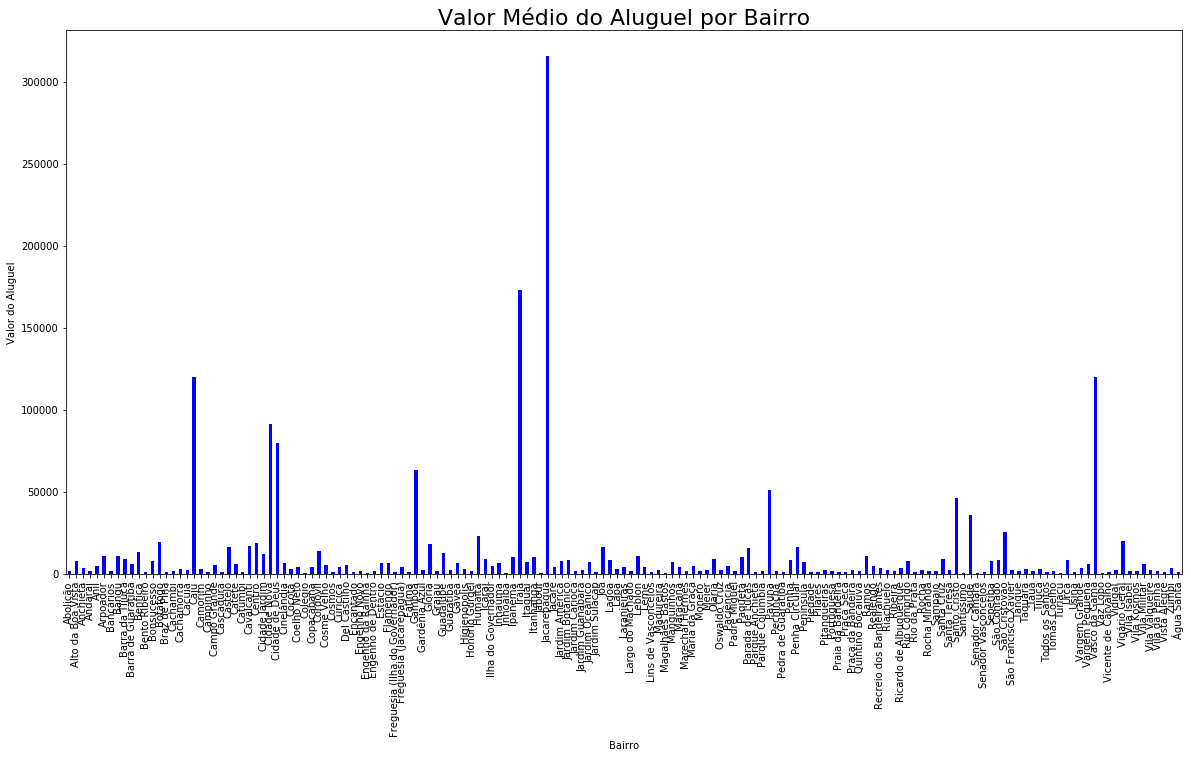

In [50]:
fig = grupo_bairro['Valor'].mean().plot.bar(color='blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro' , {'fontsize': 22})

# Parte 8

## Box plot e remoção de outliers

In [89]:
dados = pd.read_csv('aluguel.csv/aluguel_residencial.csv' , sep=';')
dados.head(5)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


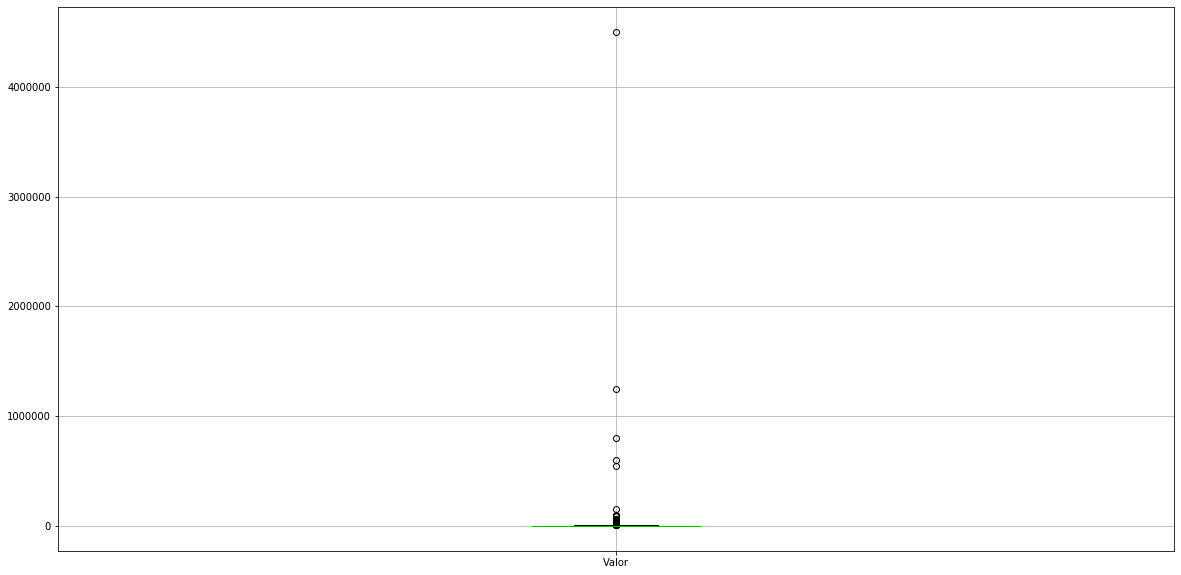

In [90]:
dados.boxplot(['Valor'])

In [91]:
dados[dados['Valor'] >= 3000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
13,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0
18,Casa de Condomínio,Barra da Tijuca,4,3,2,466,7500.0,2695.0,NaN
21,Apartamento,Ipanema,3,1,1,125,7000.0,2100.0,463.0
...,...,...,...,...,...,...,...,...,...
22567,Apartamento,Barra da Tijuca,3,2,2,140,5500.0,1900.0,700.0
22570,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0
22571,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0
22574,Casa de Condomínio,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0


In [92]:
valor = dados.Valor

In [93]:
# Ferramenta dos quartis para o boxplot
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

In [94]:
# Removendo os outliers
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

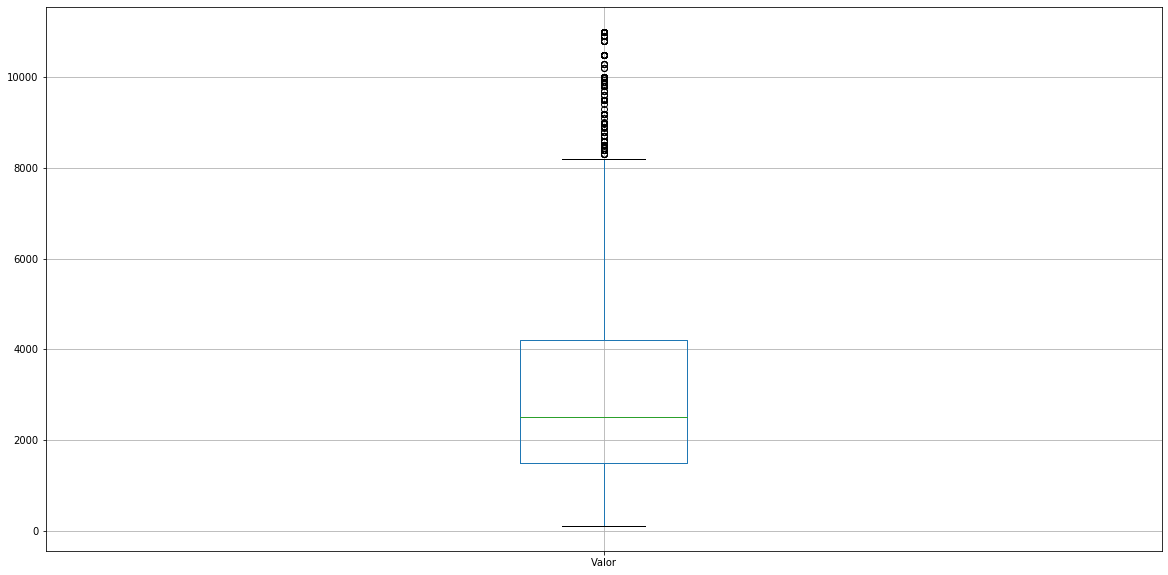

In [95]:
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000234EAE66E48>]],
      dtype=object)

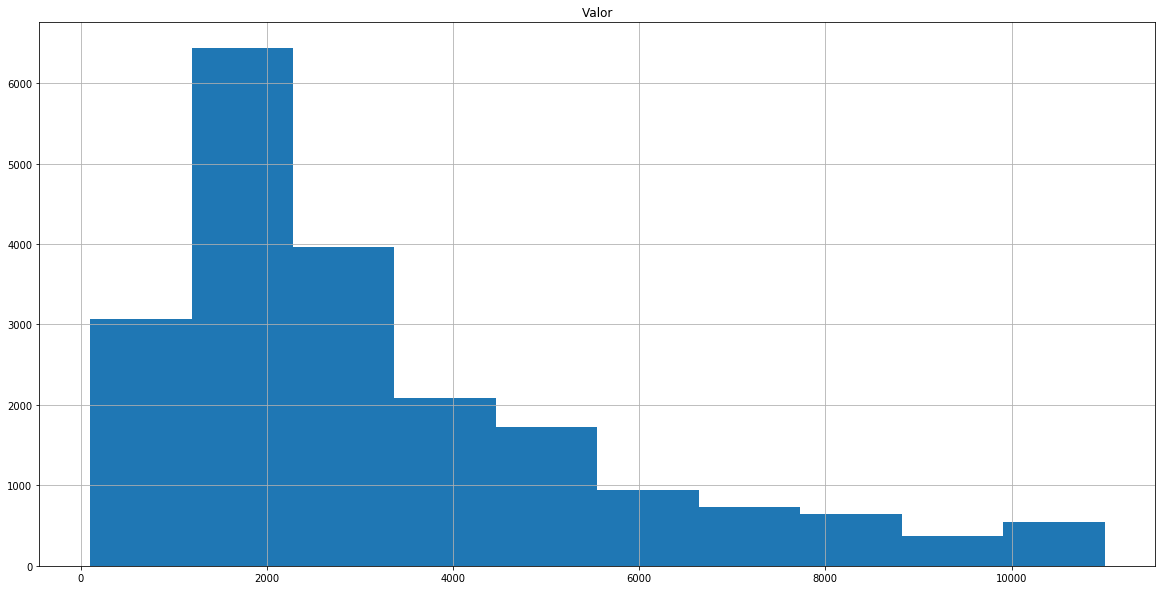

In [96]:
dados_new.hist(['Valor'])

In [97]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22580 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        22580 non-null  object 
 1   Bairro      22580 non-null  object 
 2   Quartos     22580 non-null  int64  
 3   Vagas       22580 non-null  int64  
 4   Suites      22580 non-null  int64  
 5   Area        22580 non-null  int64  
 6   Valor       22571 non-null  float64
 7   Condominio  20765 non-null  float64
 8   IPTU        15795 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.6+ MB


## Boxplot por tipo

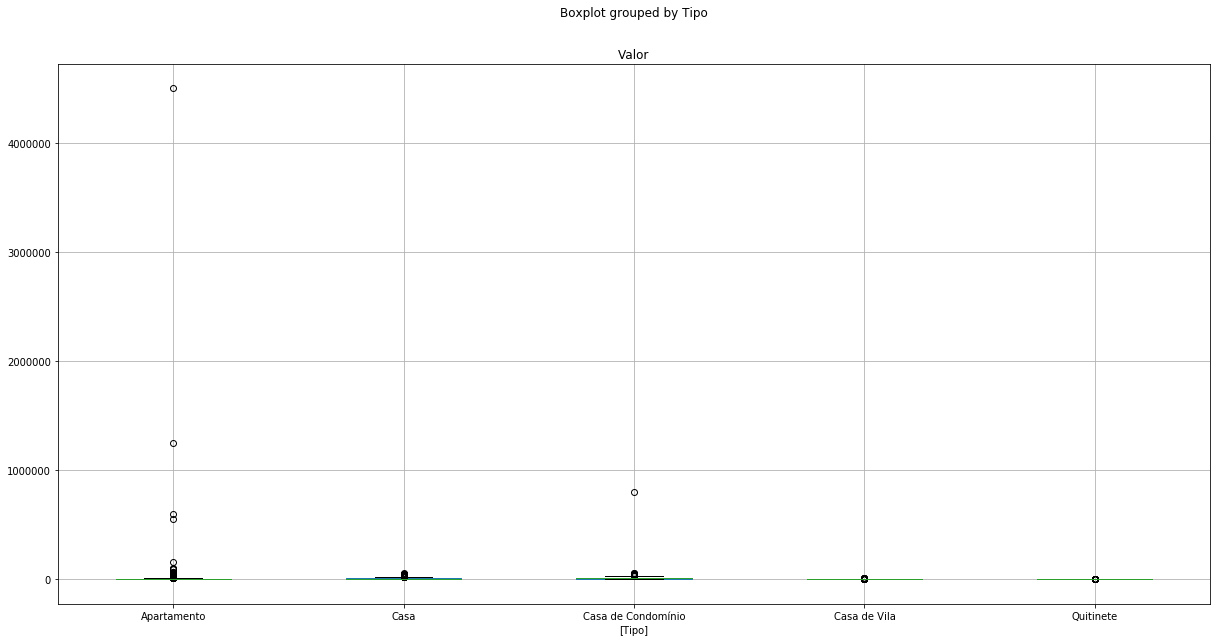

In [98]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [104]:
'''
Separar estruturas diferentes de preços-padrão diferentes
'''

grupo_tipo = dados.groupby('Tipo')['Valor'] # Agrupar apenas por valor

In [105]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [106]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5*IIQ
limite_superior = Q3 + 1.5*IIQ

In [110]:
Q1

Tipo
Apartamento           1600.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [112]:
Q1['Casa']

1100.0

In [125]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new,dados_selecao])

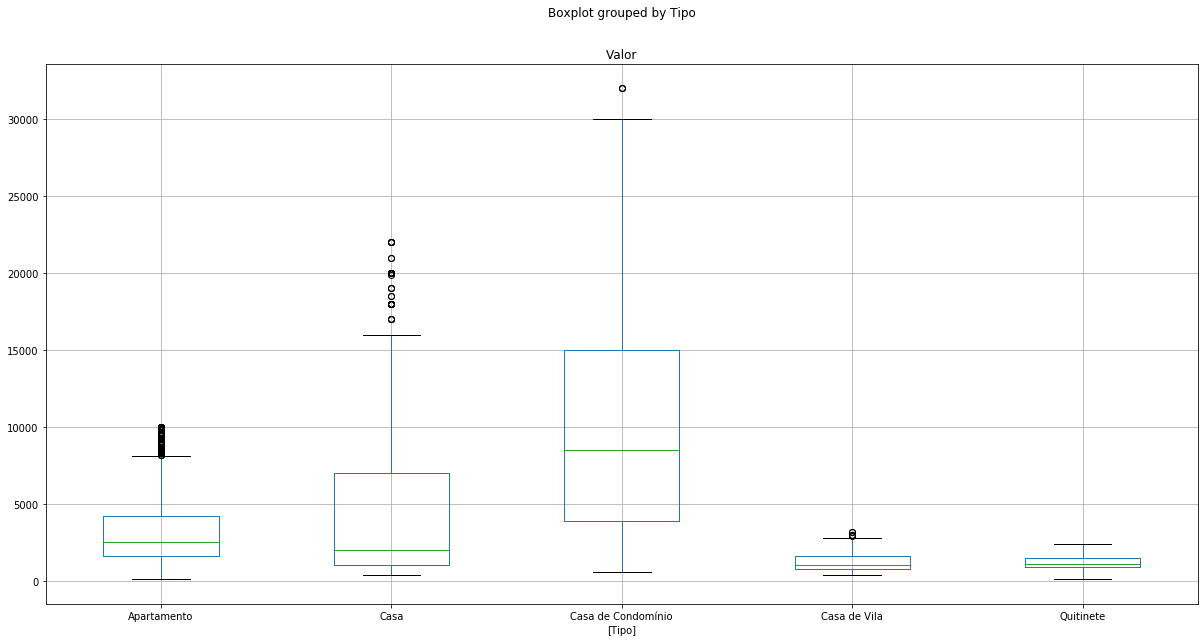

In [127]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [149]:
dados_new.to_csv('aluguel.csv/aluguel_residencial_sem_outliers.csv' , sep = ';' , index = False)

## Plot 

In [ ]:
dados = dados_new

In [148]:
area = plt.figure()

<Figure size 1440x720 with 0 Axes>

In [145]:
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

In [146]:
g1.scatter(dados.Valor, dados.Area)
g1.set_title('Valor vs Área')

g2.hist(dados.Valor)
g2.set_title('Histograma')

dados_g3 = dados.Valor.sample(100)
dados_g3.index = range(dados_g3.shape[0]) # Refazer índice
g3.plot(dados_g3)
g3.set_title('Amostras (Valor)')

grupo = dados.groupby('Tipo')['Valor']
g4.bar(grupo.mean().index , grupo.mean().values)
g4.set_title('Valor Médio por Tipo')

Text(0.5, 1.0, 'Valor Médio por Tipo')

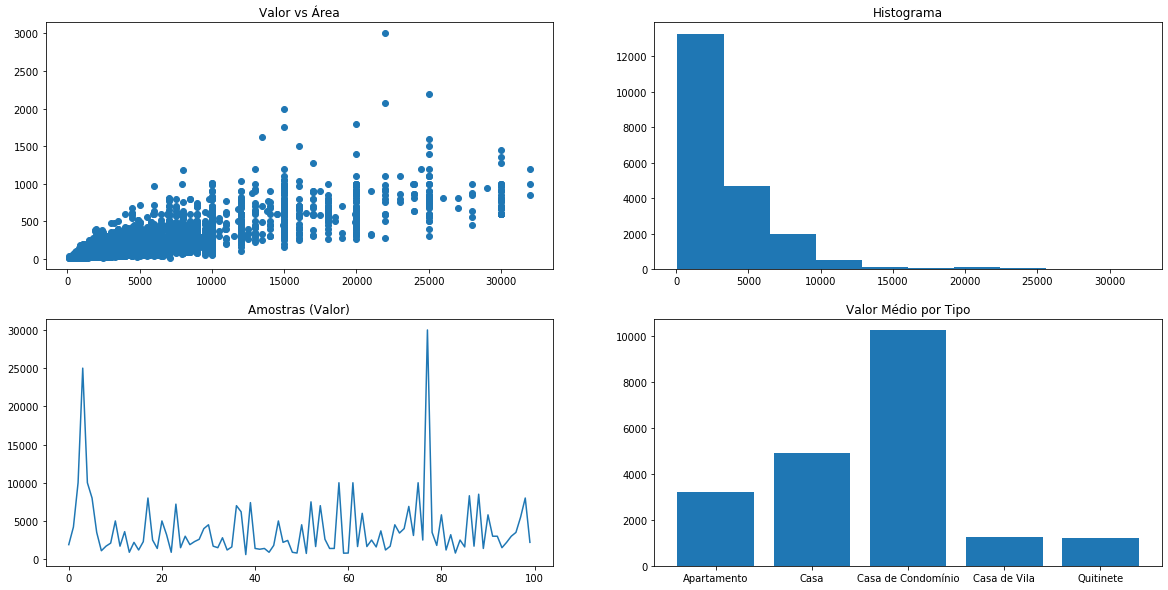

In [147]:
area

In [150]:
area.savefig('grafico.png' , dpi = 300 , bbox_inches = 'tight')